In [1]:
import torch
import numpy as np
import random
import time

seed = 42
# PyTorch
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)       # 为当前GPU设置
    torch.cuda.manual_seed_all(seed)   # 为所有GPU设置
# Python
random.seed(seed)
# NumPy
np.random.seed(seed)

QBM training completed in 0.11 seconds


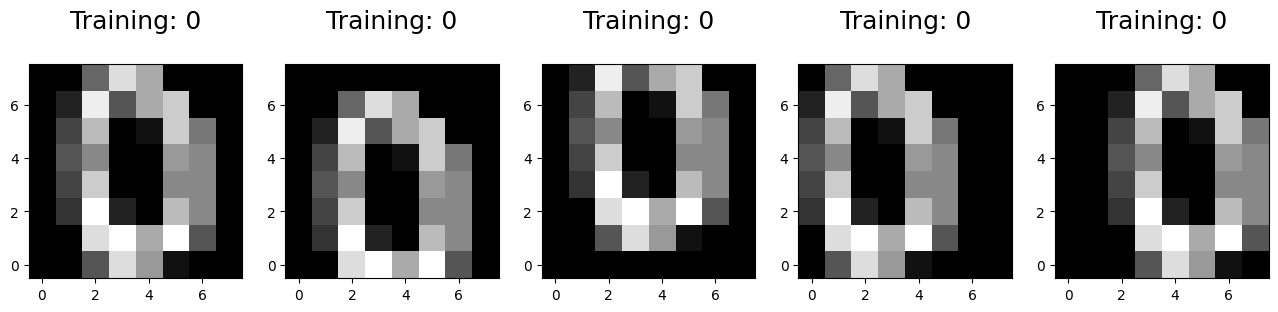

In [2]:
from rbm_digits import  RBMRunner
import kaiwu as kw
# 添加license相关信息
# kw.license.init(user_id="", sdk_code="")

# 初始化RBM
rbm = RBMRunner(
    n_components=128, 
    learning_rate=0.1, 
    batch_size=32, 
    n_iter=2, 
    verbose=True, 
    plot_img=False,
    random_state=seed
)

# 训练RBM
start_time = time.time()
X_train, X_test, y_train, y_test=rbm.load_data(plot_img=True)
training_time = time.time() - start_time
print(f"QBM training completed in {training_time:.2f} seconds")

In [3]:
rbm.fit(X_train,y_train,X_test,y_test) 

Iteration 1, Objective: 5.320100
Accuracy: 0.7774
jmean 0.039101120084524155 jmax 0.1247982457280159
hmean 0.050133466720581055 hmax 0.09960930794477463
Iteration 2, Objective: 46.246990
Iteration 3, Objective: 71.940514
Iteration 4, Objective: 17.859648
Iteration 5, Objective: 6.939580
Iteration 6, Objective: -3.238124
Accuracy: 0.7802
Iteration 7, Objective: -2.974402
Iteration 8, Objective: 3.314244
Iteration 9, Objective: -23.435970
Iteration 10, Objective: 28.085566
Iteration 11, Objective: 44.258797
Accuracy: 0.7663
Iteration 12, Objective: -27.614975
Iteration 13, Objective: -36.561356
Iteration 14, Objective: -45.456593
Iteration 15, Objective: 34.437130
Iteration 16, Objective: 28.950693
Accuracy: 0.7791
Iteration 17, Objective: 22.691502
Iteration 18, Objective: -47.192997
Iteration 19, Objective: -56.397686
Iteration 20, Objective: 27.212332
Iteration 21, Objective: 29.076456
Accuracy: 0.7691
jmean 0.051038265228271484 jmax 0.21218891441822052
hmean 0.5712037682533264 hmax 0

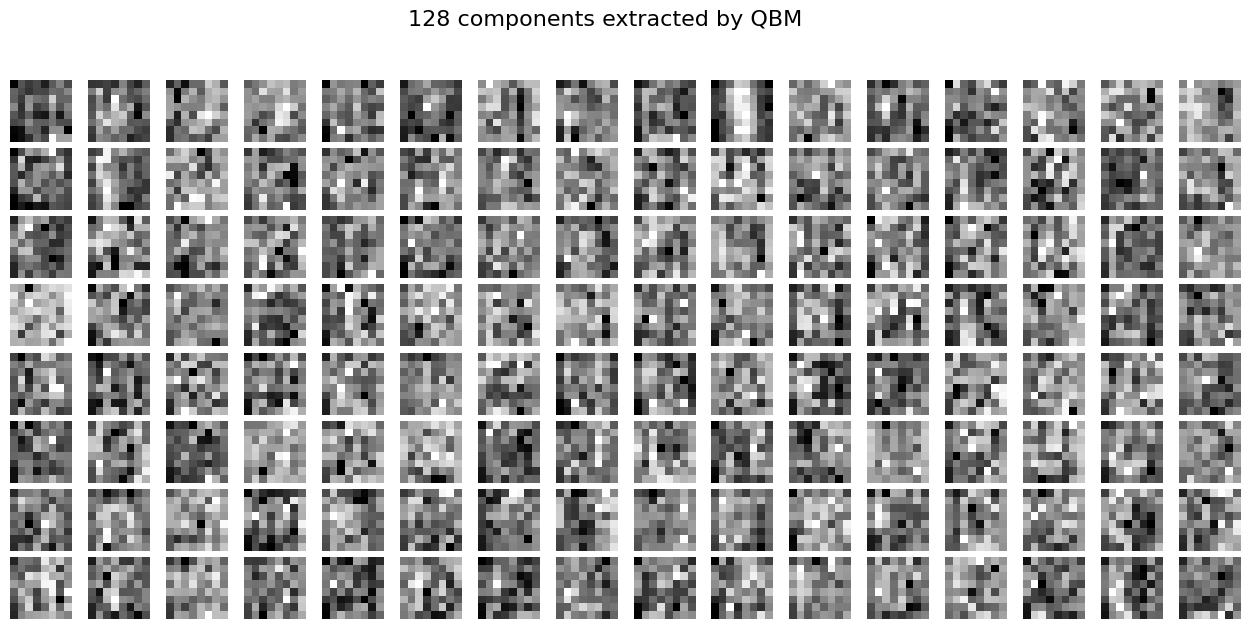

/Users/chang137/GitHub/myenv/lib/python3.10/site-packages/sklearn/linear_model/_glm/_newton_solver.py:578: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=7.18868e-10): result may not be accurate.
  warnings.warn(
/Users/chang137/GitHub/myenv/lib/python3.10/site-packages/sklearn/linear_model/_glm/_newton_solver.py:197: ConvergenceWarning: lbfgs failed to converge after 999 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=999).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       188
           1       0.85      0.84      0.85       183
           2       0.88      0.90      0.89       172
           3       0.89      0.84      0.86       205
           4       0.92      0.90      0.91       168
           5       0.86      0.86      0.86       183
           6       0.96      0.97      0.97       183
           7       0.89      0.94      0.92       189
           8       0.82      0.78      0.80       160
           9       0.81      0.82      0.81       166

    accuracy                           0.89      1797
   macro avg       0.88      0.88      0.88      1797
weighted avg       0.88      0.89      0.88      1797

Test Accuracy: 0.8854


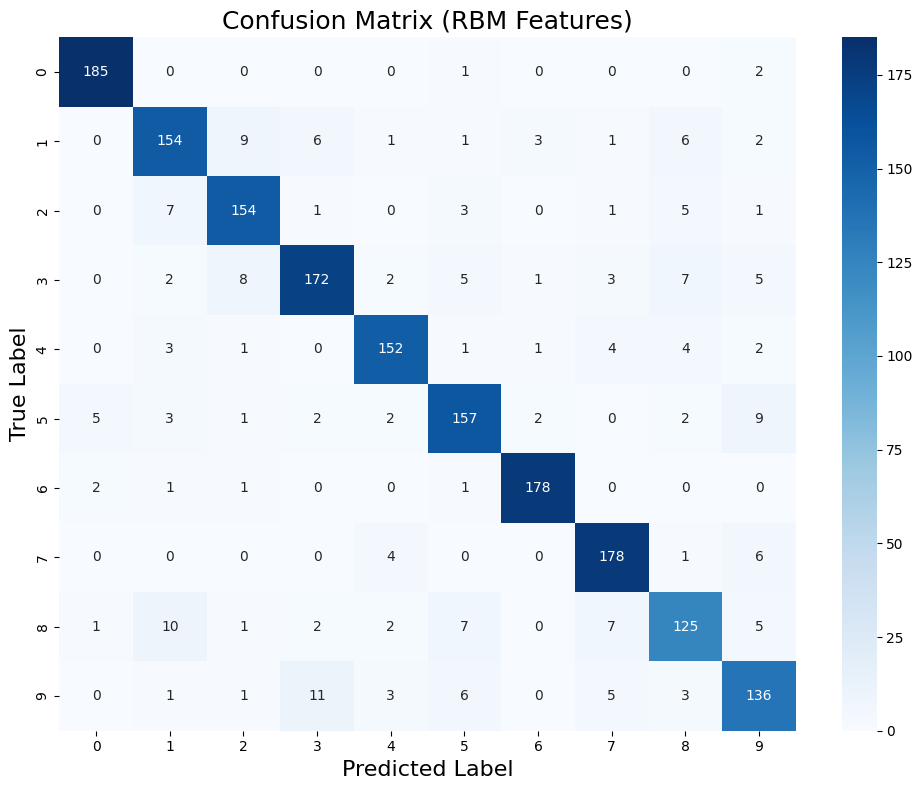

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 绘制权重
rbm.plot_weights(rbm, save_pdf=False)

# 提取特征
X_train_features = rbm.extract_features(X_train)
X_test_features = rbm.extract_features(X_test)

logqbm = LogisticRegression(C=500, max_iter=1000, tol=1e-5, solver="newton-cholesky", random_state=seed)
logqbm.fit(X_train_features, y_train)

# 最终性能评估
logqbm_pred = logqbm.predict(X_test_features)
final_acc = accuracy_score(y_test, logqbm_pred)

# print(f"\nLogistic Regression accuracy using RBM features: {final_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, logqbm_pred))
print(f"Test Accuracy: {final_acc:.4f}")

# 绘制混淆矩阵
rbm.plot_confusion_matrix(y_test, logqbm_pred, title_suffix="RBM Features", save_pdf=False)